### Data Description:
* You are provided with a datasetof  images of  plant seedlings at various stages of  grown.  Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the projectis to create a classifier capable of determining a plant's species from a photo.

### Dataset:
The dataset is download from Olympus. The data file names are:
- images.npy
- Label.csv

### Context:
Can you differentiate a weed from a crop seedling? The ability to do so effectively can mean better crop yields and better stewardship of the environment. The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

git repo: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-bunty-sunbird/tree/master/project/Plant-Seed-Classification

- [Import the libraries, load dataset, print shape of data, visualize the images in dataset.](#1)
- [Data Pre-processing](#2)
    - [Normalization.](#2.1)
    - [Gaussian Blurring.](#2.2)
    - [Visualize data after pre-processing.](#2.3)
- [Make data compatible](#3)
    - [Convert labels to one-hot-vectors.](#3.1)
    - [Print the label for y_train[0].](#3.2)
    - [Split the dataset into training, testing, and validation set.](#3.3)
    First split images and labels into training and testing set with test_size = 0.3. Then further split 
    test data into test and validation set with test_size = 0.5
    - [Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.](#3.4)
- [Building CNN](#4)
    - [Define layers.](#4.1)
    - [Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)](#4.2)
- [Fit and evaluate model and print confusion matrix. (10 Marks)](#5)
- [Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].](#6)

### Import the libraries<a class="anchor" id='1'></a>

In [1]:
from skimage import data, io

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, 
    Dropout, 
    Flatten, 
    Conv2D, 
    MaxPooling2D, 
    MaxPool2D,
    GlobalMaxPooling2D,
    BatchNormalization
)
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

### Load dataset

In [3]:
trainImg = np.load("./images.npy")

In [4]:
trainImg.shape

(4750, 128, 128, 3)

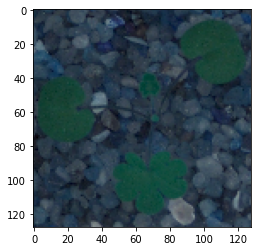

In [5]:
i=1
img = trainImg[i]
img = img.reshape((128,128, 3))
# plt.imshow(img, cmap='gray')
plt.imshow(img)
# plt.title(y[i])

In [6]:
df = pd.read_csv("./Labels.csv")

In [7]:
trainLabel = df['Label'].to_numpy()

In [8]:
trainImg.shape, trainLabel.shape

((4750, 128, 128, 3), (4750,))

### visualize the images in dataset

Image name:Small-flowered Cranesbill


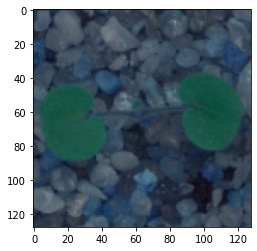

Image name:Fat Hen


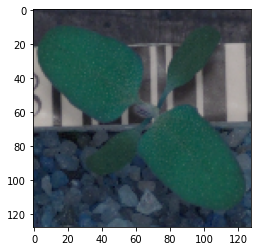

Image name:Shepherds Purse


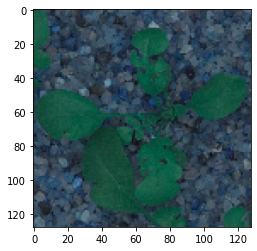

In [9]:
# Check Images
for i in (0, 500, 1000):
    img = trainImg[i]
    label = trainLabel[i]
    print(f'Image name:{label}')
    plt.imshow(img)
    plt.show()


## Data Pre-processing<a class="anchor" id='2'></a>

### Normalization<a class="anchor" id='2.1'></a>

In [10]:
trainImg = trainImg.astype('float32')
trainImg /= 255
# Check the nomalized data
print(f'Shape of the Train array:{trainImg.shape}')
print(f'Minimum value in the Train Array:{trainImg.min()}')
print(f'Maximum value in the Train Array:{trainImg.max()}')

Shape of the Train array:(4750, 128, 128, 3)
Minimum value in the Train Array:0.0
Maximum value in the Train Array:1.0


#### Split the data into train, validation and test set<a class="anchor" id='3.3'></a>

In [11]:
from sklearn.model_selection import train_test_split

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(trainImg, trainLabel, test_size=0.3, random_state=42, stratify=trainLabel) 
X_train.shape, X_test.shape

((3325, 128, 128, 3), (1425, 128, 128, 3))

In [12]:
# Step#2: Split validation from test set
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
X_test.shape, X_validation.shape


((712, 128, 128, 3), (713, 128, 128, 3))

In [13]:
# X_train.shape

In [14]:
#y_train

#### Check distribution of each class in the original, train, test and validation data set

Count of seeds in the original data


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

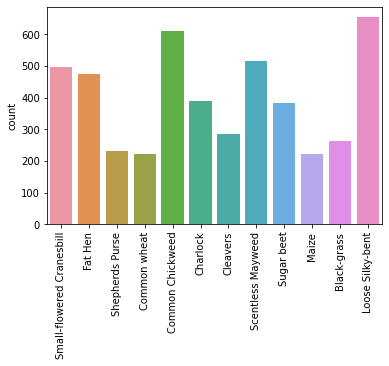

In [15]:
print("Count of seeds in the original data")

sns.countplot(trainLabel)
plt.xticks(rotation=90)

Count of seeds in the train data


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

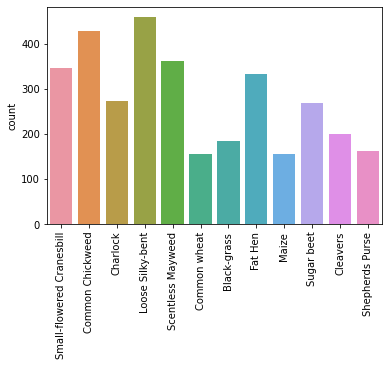

In [16]:
print("Count of seeds in the train data")

sns.countplot(y_train)
plt.xticks(rotation=90)

Count of seeds in the test data


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

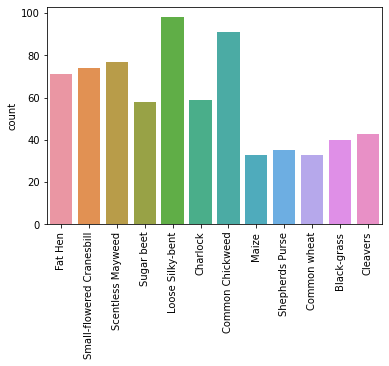

In [17]:
print("Count of seeds in the test data")

sns.countplot(y_test)
plt.xticks(rotation=90)

Count of seeds in the validation data


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

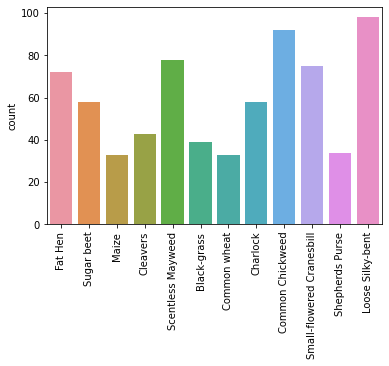

In [18]:
print("Count of seeds in the validation data")

sns.countplot(y_validation)
plt.xticks(rotation=90)

### Gaussian Blurring<a class="anchor" id='2.2'></a>

In [19]:
# Now we apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(X_train):
  X_train[idx] = cv2.GaussianBlur(img, (5, 5), 0)

In [20]:
# Gaussian Blue to Test and Validation sets
for idx, img in enumerate(X_test):
  X_test[idx] = cv2.GaussianBlur(img, (5, 5), 0)

for idx, img in enumerate(X_validation):
  X_validation[idx] = cv2.GaussianBlur(img, (5, 5), 0)

#### Visualize data after pre-processing<a class="anchor" id='2.3'></a>

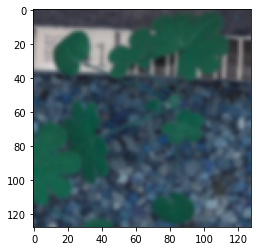

In [21]:
# Preview the image after Gaussian Blur
plt.imshow(X_train[0], cmap='gray')

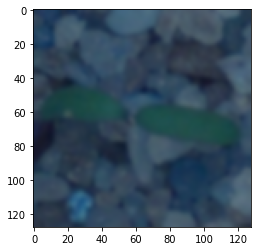

In [22]:
plt.imshow(X_validation[0], cmap='gray')

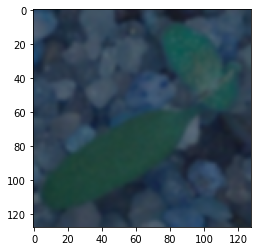

In [23]:
plt.imshow(X_test[0], cmap='gray')

## Make data compatible<a class="anchor" id='3'></a>

In [24]:
y_train_label = y_train
y_test_label = y_test
y_validation_label = y_validation

#### One-hot encode the output labels<a class="anchor" id='3.1'></a>

In [25]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
y_validation = encoder.fit_transform(y_validation)


In [26]:
integer_mapping = {l: i for i, l in enumerate(encoder.classes_)}

In [27]:
integer_mapping

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [28]:
integer_mapping.keys()

dict_keys(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'])

In [29]:
y_train.shape, y_test.shape, y_validation.shape

((3325, 12), (712, 12), (713, 12))

In [30]:
y_train_label[0]

'Small-flowered Cranesbill'

In [31]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

#### Print the label for y_train[0]<a class="anchor" id='3.2'></a>

In [32]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [33]:
y_train_label = encoder.inverse_transform(y_train)

y_train_label[0]

'Small-flowered Cranesbill'

#### Check  the  shape  of  data, Reshape  data  into  shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape<a class="anchor" id='3.4'></a>

In [34]:
y_train.shape, y_test.shape, y_validation.shape

((3325, 12), (712, 12), (713, 12))

In [35]:
X_train.shape, X_test.shape, X_validation.shape

((3325, 128, 128, 3), (712, 128, 128, 3), (713, 128, 128, 3))

In [36]:
# data is already compatible with the CNN model that we need to build, the input data 
# input(X_train, X_test, X_validation) have the shape of (width, height, channels) and
# output labels (y_train, y_test, y_validation) is already in one hot encoded format (12: one per label)

# the data is ready to be applied the model

## Building CNN<a class="anchor" id='4'></a>

### Define Layers<a class="anchor" id='4.1'></a>

In [39]:
def create_model(input_shape, num_classes):
  # Initialize CNN Classified
  model = Sequential()

  # Add convolution layer with 32 filters and 3 kernels
  model.add(Conv2D(32, (3,3), input_shape=input_shape, padding='same', activation=tf.nn.relu))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  # Add convolution layer with 32 filters and 3 kernels
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation=tf.nn.relu))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation=tf.nn.relu))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  # Add convolution layer with 32 filters and 3 kernels
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation=tf.nn.relu))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  # Flatten the 2D array to 1D array
  model.add(Flatten())

  # Create fully connected layers with 512 units
  model.add(Dense(512, activation=tf.nn.relu))
  model.add(Dropout(0.5))


  # Adding a fully connected layer with 128 neurons
  model.add(Dense(units = 128, activation = tf.nn.relu))
  model.add(Dropout(0.5))

  # The final output layer with 12 neurons to predict the categorical classifcation
  model.add(Dense(units = num_classes, activation = tf.nn.softmax))
  return model

In [ ]:
# callback for early stopping when the desired result is achieved 

In [40]:
#
# generate a callback for break early if we have 95% accuracy
# 

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=10)

### Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)<a class="anchor" id='4.2'></a>

In [41]:
#
# create the model, apply the optimizer, loss function and mertics
#

input_shape = X_train.shape[1:] # Input shape of X_train
num_classes = y_train.shape[1] # Target column size

model = create_model(input_shape, num_classes)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Optimizer
# optimizer = tf.keras.optimizers.SGD(lr=1 * 1e-1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0

In [8]:
# apply data augmentation to avoid overfitting and generate more data 

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(X_train)

### Fit and evaluate model and print confusion matrix.<a class="anchor" id='5'></a>

In [43]:
history_A = model.fit_generator(datagen.flow(X_train, y_train, batch_size=75), 
                                epochs=60, validation_data=(X_validation, y_validation), verbose=2)


Epoch 1/60
45/45 - 43s - loss: 2.4636 - accuracy: 0.1212 - val_loss: 2.4548 - val_accuracy: 0.1374
Epoch 2/60
45/45 - 43s - loss: 2.3991 - accuracy: 0.1771 - val_loss: 2.1601 - val_accuracy: 0.3086
Epoch 3/60
45/45 - 81s - loss: 2.0560 - accuracy: 0.2986 - val_loss: 1.7558 - val_accuracy: 0.3689
Epoch 4/60
45/45 - 45s - loss: 1.8568 - accuracy: 0.3429 - val_loss: 1.6494 - val_accuracy: 0.4053
Epoch 5/60
45/45 - 53s - loss: 1.7582 - accuracy: 0.3681 - val_loss: 1.5982 - val_accuracy: 0.4390
Epoch 6/60
45/45 - 48s - loss: 1.6906 - accuracy: 0.3961 - val_loss: 1.4750 - val_accuracy: 0.4895
Epoch 7/60
45/45 - 47s - loss: 1.6573 - accuracy: 0.4150 - val_loss: 1.3893 - val_accuracy: 0.5273
Epoch 8/60
45/45 - 49s - loss: 1.5758 - accuracy: 0.4457 - val_loss: 1.3857 - val_accuracy: 0.5442
Epoch 9/60
45/45 - 45s - loss: 1.4448 - accuracy: 0.4938 - val_loss: 1.2140 - val_accuracy: 0.6087
Epoch 10/60
45/45 - 54s - loss: 1.3997 - accuracy: 0.5182 - val_loss: 1.1458 - val_accuracy: 0.6311
Epoch 11/

In [44]:
# history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=30, batch_size=100, callbacks=[callbacks])

# history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=50, batch_size=100, callbacks=[callbacks])


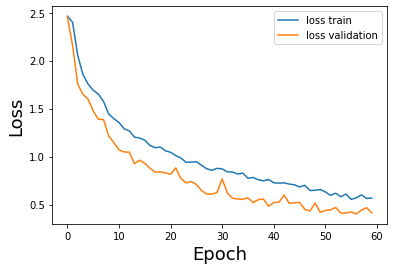

In [45]:
# plot the convergence of the loss score
plt.plot(history_A.history['loss'])
plt.plot(history_A.history['val_loss'])
plt.xlabel('Epoch', fontsize=18)
plt.ylabel(r'Loss', fontsize=18)
plt.legend(('loss train','loss validation'), loc=0)

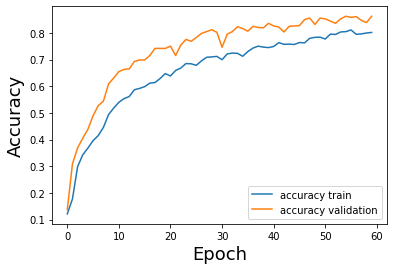

In [46]:
# Plot accuracy score
plt.plot(history_A.history['accuracy'])
plt.plot(history_A.history['val_accuracy'])
plt.xlabel('Epoch', fontsize=18)
plt.ylabel(r'Accuracy', fontsize=18)
plt.legend(('accuracy train','accuracy validation'), loc=0)

In [47]:
# evaluate the model on the test data and get the score for the test data

loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Test loss: {:.2f} \n Test accuracy: {:.4f}'.format(loss, accuracy))

loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print('Train loss: {:.2f} \n Train accuracy: {:.4f}'.format(loss, accuracy))

712/1 - 1s - loss: 0.3462 - accuracy: 0.8750
Test loss: 0.38 
 Test accuracy: 0.8750
3325/1 - 6s - loss: 0.3672 - accuracy: 0.8878
Train loss: 0.31 
 Train accuracy: 0.8878


In [6]:
# Save the model to avoid re-fit

In [51]:
from tensorflow.keras.models import load_model
model.save('./final_model.h5')

In [52]:
model.load_weights('./final_model.h5')


In [53]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

In [54]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

=== Confusion Matrix ===
[[15  0  0  0  5  2 17  0  1  0  0  0]
 [ 1 55  3  0  0  0  0  0  0  0  0  0]
 [ 4  3 35  0  1  0  0  0  0  0  0  0]
 [ 5  0  0 83  0  1  0  0  1  0  1  0]
 [ 3  0  0  0 28  2  0  0  0  0  0  0]
 [ 6  1  2  0  2 59  1  0  0  0  0  0]
 [ 9  0  0  0  3  2 84  0  0  0  0  0]
 [ 3  0  0  0  0  0  0 30  0  0  0  0]
 [ 2  0  0  0  1  0  1  0 73  0  0  0]
 [ 3  1  0  0  0  0  0  0 10 20  1  0]
 [ 1  0  0  0  0  0  0  0  0  0 73  0]
 [ 5  1  0  0  0  0  0  0  0  0  0 52]]


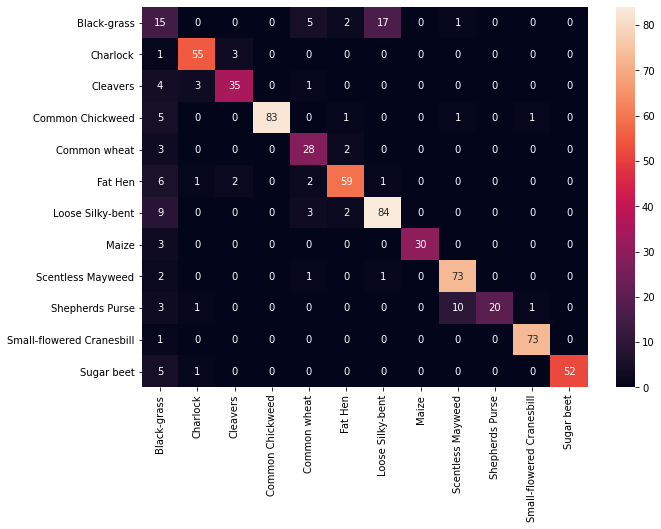

In [55]:
# integer_mapping.keys()
df_cm1 = pd.DataFrame(cm, index = integer_mapping.keys(),
                      columns = integer_mapping.keys())

# df_cm = pd.DataFrame(cm, index = [i for i in range(0,12)],
#                      columns = trainLabel)

# trainLabel

plt.figure(figsize = (10,7))
sns.heatmap(df_cm1, annot=True, fmt='d')

In [3]:
# Observation

# Black-grass can easily be confused with 'Loose Silky-bent' and visa versa. Out of 40 black-grass, 17 is predicted
# incorrectly

# 'Shepherds Purse' can get confused with 'Scentless Mayweed' and visa versa. Out of 35 black-grass, 10 is predicted
# incorrectly

# Other plants are providing a good predictions, we will the numbers using classification report next


In [58]:
#
# generate the classification report
#

report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), output_dict=True)


In [59]:
label_mapping = dict([(str(value), key) for key, value in integer_mapping.items()]) 

In [61]:
print("=== Classification Report ===")

pd.DataFrame(report).transpose().rename(index=label_mapping)

=== Classification Report ===


,precision,recall,f1-score,support
Black-grass,0.263158,0.375000,0.309278,40.000000
Charlock,0.901639,0.932203,0.916667,59.000000
Cleavers,0.875000,0.813953,0.843373,43.000000
Common Chickweed,1.000000,0.912088,0.954023,91.000000
Common wheat,0.700000,0.848485,0.767123,33.000000
Fat Hen,0.893939,0.830986,0.861314,71.000000
Loose Silky-bent,0.815534,0.857143,0.835821,98.000000
Maize,1.000000,0.909091,0.952381,33.000000
Scentless Mayweed,0.858824,0.948052,0.901235,77.000000
Shepherds Purse,1.000000,0.571429,0.727273,35.000000


In [4]:
### Observation

# "Black-grass" have very low (around 0.26) precision, recall (0.375) and f1-score (0.309) and will be hard to predict
# compared to other plants and weeds

# "Common wheat" have the second worst precision score (0.7) and recall score but not as worst as "Black-grass"

# Most of them have a good precision and accuracy score

In [66]:
y_pred_label = encoder.inverse_transform(y_pred)

type(y_pred_label)

np.unique(y_pred_label)

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

Predicted label: Scentless Mayweed


'Scentless Mayweed'

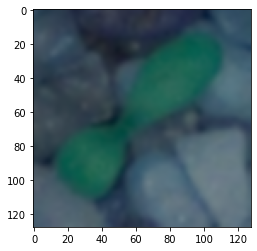

In [67]:
#
# Let us check the predictions against the actual
#
index = 2
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred_label[index])
y_test_label[index]

Predicted label: Sugar beet


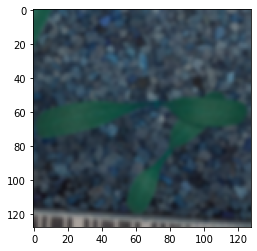

In [68]:
index = 3
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred_label[index])

In [71]:
# 
# check all predictions i.e. predicted v/s real
#

for index in range(y_pred.shape[0]):
    print("Index: ", index, " | Predicted label:", y_pred_label[index], " | y_test_label: ", y_test_label[index])
    

Index:  0  | Predicted label: Cleavers  | y_test_label:  Fat Hen
Index:  1  | Predicted label: Small-flowered Cranesbill  | y_test_label:  Small-flowered Cranesbill
Index:  2  | Predicted label: Scentless Mayweed  | y_test_label:  Scentless Mayweed
Index:  3  | Predicted label: Sugar beet  | y_test_label:  Sugar beet
Index:  4  | Predicted label: Small-flowered Cranesbill  | y_test_label:  Small-flowered Cranesbill
Index:  5  | Predicted label: Loose Silky-bent  | y_test_label:  Loose Silky-bent
Index:  6  | Predicted label: Charlock  | y_test_label:  Charlock
Index:  7  | Predicted label: Scentless Mayweed  | y_test_label:  Scentless Mayweed
Index:  8  | Predicted label: Small-flowered Cranesbill  | y_test_label:  Small-flowered Cranesbill
Index:  9  | Predicted label: Sugar beet  | y_test_label:  Sugar beet
Index:  10  | Predicted label: Common Chickweed  | y_test_label:  Common Chickweed
Index:  11  | Predicted label: Scentless Mayweed  | y_test_label:  Scentless Mayweed
Index:  12 

Index:  341  | Predicted label: Common wheat  | y_test_label:  Common wheat
Index:  342  | Predicted label: Black-grass  | y_test_label:  Common Chickweed
Index:  343  | Predicted label: Small-flowered Cranesbill  | y_test_label:  Small-flowered Cranesbill
Index:  344  | Predicted label: Sugar beet  | y_test_label:  Sugar beet
Index:  345  | Predicted label: Charlock  | y_test_label:  Charlock
Index:  346  | Predicted label: Black-grass  | y_test_label:  Maize
Index:  347  | Predicted label: Loose Silky-bent  | y_test_label:  Loose Silky-bent
Index:  348  | Predicted label: Cleavers  | y_test_label:  Cleavers
Index:  349  | Predicted label: Fat Hen  | y_test_label:  Fat Hen
Index:  350  | Predicted label: Fat Hen  | y_test_label:  Fat Hen
Index:  351  | Predicted label: Cleavers  | y_test_label:  Cleavers
Index:  352  | Predicted label: Common Chickweed  | y_test_label:  Common Chickweed
Index:  353  | Predicted label: Cleavers  | y_test_label:  Cleavers
Index:  354  | Predicted label:

Index:  617  | Predicted label: Sugar beet  | y_test_label:  Sugar beet
Index:  618  | Predicted label: Common Chickweed  | y_test_label:  Common Chickweed
Index:  619  | Predicted label: Common Chickweed  | y_test_label:  Common Chickweed
Index:  620  | Predicted label: Small-flowered Cranesbill  | y_test_label:  Small-flowered Cranesbill
Index:  621  | Predicted label: Loose Silky-bent  | y_test_label:  Loose Silky-bent
Index:  622  | Predicted label: Scentless Mayweed  | y_test_label:  Scentless Mayweed
Index:  623  | Predicted label: Shepherds Purse  | y_test_label:  Shepherds Purse
Index:  624  | Predicted label: Loose Silky-bent  | y_test_label:  Black-grass
Index:  625  | Predicted label: Charlock  | y_test_label:  Charlock
Index:  626  | Predicted label: Scentless Mayweed  | y_test_label:  Scentless Mayweed
Index:  627  | Predicted label: Charlock  | y_test_label:  Charlock
Index:  628  | Predicted label: Charlock  | y_test_label:  Charlock
Index:  629  | Predicted label: Scent

### Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. <a class="anchor" id='6'></a>

Predicted label: Scentless Mayweed  | index:  2  | y_test_label:  Scentless Mayweed


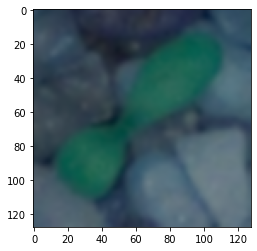

Predicted label: Sugar beet  | index:  3  | y_test_label:  Sugar beet


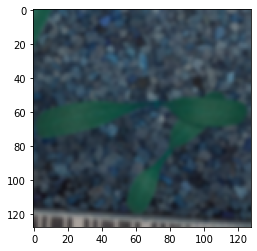

Predicted label: Fat Hen  | index:  33  | y_test_label:  Fat Hen


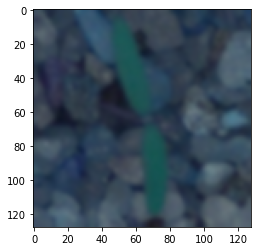

Predicted label: Fat Hen  | index:  36  | y_test_label:  Fat Hen


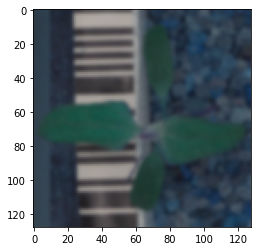

Predicted label: Scentless Mayweed  | index:  59  | y_test_label:  Scentless Mayweed


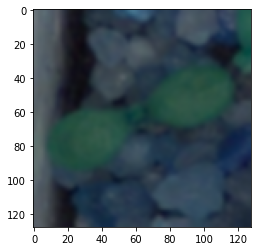

In [72]:
for index in (2, 3, 33, 36, 59):
    plt.imshow(X_test[index], cmap='gray')
    print("Predicted label:", y_pred_label[index], " | index: ", index, " | y_test_label: ", y_test_label[index])
    y_test_label[index]
    plt.show()

In [7]:
# Observation:

# For the requested index all predictions were correct.

# Overall we got a good model that is not an over or underfit, with train and test accuracy alomost the same i.e. 
# approximately 0.88. Even the accuracy on the validation set was close to the training accuracy

# As per the Confusion matrix
# Most the plants will get predicted except for some instance of black-grass where it can get confused with 
# 'Loose Silky-bent' and visa versa

# 'Shepherds Purse' can get confused with 'Scentless Mayweed' and visa versa. Out of 35 black-grass, 10 is predicted
# incorrectly

# As per the classification report, all plants and weeds got good score except for the black-grass for which we can
# make it better my providing more images for classification model